<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1)-데이터프레임-기초와-필터링" data-toc-modified-id="1)-데이터프레임-기초와-필터링-1">1) 데이터프레임 기초와 필터링</a></span></li><li><span><a href="#2)-요약" data-toc-modified-id="2)-요약-2">2) 요약</a></span></li><li><span><a href="#3)-파생변수-생성" data-toc-modified-id="3)-파생변수-생성-3">3) 파생변수 생성</a></span></li><li><span><a href="#4)-텍스트-데이터-처리" data-toc-modified-id="4)-텍스트-데이터-처리-4">4) 텍스트 데이터 처리</a></span></li><li><span><a href="#6)-Pivoting" data-toc-modified-id="6)-Pivoting-5">6) Pivoting</a></span></li><li><span><a href="#7)-데이터-병합" data-toc-modified-id="7)-데이터-병합-6">7) 데이터 병합</a></span></li><li><span><a href="#8)-기타" data-toc-modified-id="8)-기타-7">8) 기타</a></span></li></ul></div>

Q. 데이터프레임을 다루는 패키지를 불러오자

In [1]:
import pandas as pd

# 1) 데이터프레임 기초와 필터링

- DataFrame 색인 `.colname vs ['colname']`

In [2]:
dict(a=[1,2,3], shape=[7,34,1])

{'a': [1, 2, 3], 'shape': [7, 34, 1]}

In [25]:
df=pd.DataFrame(dict(a=[1,2,3], shape=[7,34,1]))
df

,a,shape
0,1,7
1,2,34
2,3,1


In [26]:
df['a']

0    1
1    2
2    3
Name: a, dtype: int64

In [27]:
df.a

0    1
1    2
2    3
Name: a, dtype: int64

In [28]:
df['shape']

0     7
1    34
2     1
Name: shape, dtype: int64

In [29]:
df.shape

(3, 2)

- DataFrame의 변수명 확인 및 변경

In [30]:
df.columns.values[0] = 'b'

In [31]:
df

,b,shape
0,1,7
1,2,34
2,3,1


> 버그있어서 반영이 안되는 경우도 있다!

In [32]:
df=df.rename(columns={'shape':'c'})
df

,b,c
0,1,7
1,2,34
2,3,1


- Pandas 객체 필터링  `loc vs. iloc`  
    - file: `krx_202105_utf8.csv`
    - Purely integer-location based indexing for selection by position. `iloc`

In [33]:
df

,b,c
0,1,7
1,2,34
2,3,1


In [34]:
df.loc[1:]

,b,c
1,2,34
2,3,1


In [35]:
df.iloc[1:]

,b,c
1,2,34
2,3,1


> 똑같아 보이죠? 내부 작동은 다르다!

In [40]:
df.index = [11,12,13]
df

,b,c
11,1,7
12,2,34
13,3,1


In [41]:
df.loc[11:]

,b,c
11,1,7
12,2,34
13,3,1


In [42]:
df.iloc[11:]

,b,c


> loc는 인덱스 이름 기준으로 작동! iloc는 인덱스 순서로 작동


In [23]:
df.loc[0]

KeyError: 0

In [145]:
df.iloc[0]

b    1
c    7
Name: 11, dtype: int64

- 인덱스가 꼬여 있는 경우

In [58]:
df=pd.DataFrame(dict(val=[1,2,3,6]),index=[-3,-1,-1,-4])
df

,val
-3,1
-1,2
-1,3
-4,6


In [59]:
df.loc[:-1]

,val
-3,1
-1,2
-1,3


> 인덱스 이름 기준으로 앞 인덱스들 가져온다

In [60]:
df.iloc[:-1]

,val
-3,1
-1,2
-1,3


In [ ]:
df

In [61]:
df.iloc[1:]

,val
-1,2
-1,3
-4,6


> 바로 마지막 인덱스 순서 제외하고 나온다 df.iloc[1:] vs. df.iloc[:-1]

In [63]:
df=pd.DataFrame(dict(val=[1,2,3]),index=['가','나','다'])
df

,val
가,1
나,2
다,3


In [70]:
df.iloc[:-1]

,val
가,1
나,2


In [69]:
df.iloc[-1]

val    3
Name: 다, dtype: int64

In [78]:
df.loc[-1]

KeyError: -1

In [ ]:
df.loc['다']

> -1 의 사용에 따라 의미가 다름   
`iloc`
슬라이싱[:-1] 할 때는 -1번째 행부터 앞행까지 뜻함
인덱싱[-1] 할 때는 제일 끝을 뜻함
  
> `loc`
는 인덱싱할 때도 인덱스 이름에 없으면 나오지 않음

In [148]:
df.reset_index()

,index,b,c
0,11,1,7
1,12,2,34
2,13,3,1


In [150]:
df=df.reset_index(drop=True)
df

---

Q. `krx_202105_utf8.csv` 을 불러오자

In [ ]:
import os
os.getcwd()

In [3]:
df_krx = pd.read_csv('../Datasets/krx_202105_utf8.csv')
df_krx.head(2)

,지수명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,날짜
0,KRX 300,1901.05,-11.63,-0.61,1913.15,1929.94,1896.65,279548840,13488481375036,2028800954161500,20210503
1,KTOP 30,11520.28,-86.30,-0.74,11609.44,11702.14,11490.84,50048566,5645660149606,1208343758559140,20210503


Q. 단순회귀(독립 `시가`, 종속 `종가` ) 문제에서 독립변수를 함수에 넣을 때 올바른 방법은?
`df_krx['시가'] vs. df_krx[['시가']]`

In [4]:
df_krx['시가'].shape

(551,)

In [5]:
df_krx[['시가']].shape

(551, 1)

> 패키지 마다 다른데 shape 에러 나면 shape에 맞게 바꿔주면 됨

Q. `지수명` 변수의 원소가 `KRX 300`이거나 `KRX 반도체`인 행을 추출하여 df_krx300_krxban 객체에 저장하시오.

In [4]:
df_krx300_krxban =df_krx.loc[df_krx['지수명'].isin(['KRX 300','KRX 반도체'])]
df_krx300_krxban.head(2)

,지수명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,날짜
0,KRX 300,1901.05,-11.63,-0.61,1913.15,1929.94,1896.65,279548840,13488481375036,2028800954161500,20210503
5,KRX 반도체,3852.24,-20.18,-0.52,3872.85,3940.15,3836.17,19861668,952405532133,131186340258830,20210503


Q. df_krx300_krxban 객체에서 `거래대금`이 가장 큰 `지수명`은?

In [27]:
df_krx300_krxban.loc[df_krx300_krxban['거래대금']==df_krx300_krxban['거래대금'].max(), '지수명']

464    KRX 300
Name: 지수명, dtype: object

In [6]:
df_krx300_krxban.loc[464]

지수명                KRX 300
종가                 1910.09
대비                   -1.59
등락률                  -0.08
시가                 1913.55
고가                 1915.55
저가                 1894.84
거래량              327607567
거래대금        17156385452981
상장시가총액    2043966667110420
날짜                20210527
Name: 464, dtype: object

- 데이터 정렬 `sort`

Q. df_krx에서 20210527 에 거래된 지수 중 거래대금이 큰 순으로 5개 추출하면?

In [44]:
df_krx[df_krx.날짜==20210527].sort_values(by='거래대금', ascending=False)[:5]

,지수명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,날짜
464,KRX 300,1910.09,-1.59,-0.08,1913.55,1915.55,1894.84,327607567,17156385452981,2043966667110420,20210527
466,KRX 100,6631.32,-9.37,-0.14,6646.38,6653.30,6574.30,146420657,12129156337634,1697216654394830,20210527
465,KTOP 30,11450.08,-41.91,-0.36,11486.14,11497.12,11339.63,65398765,7845326920724,1193021507292880,20210527
483,KRX 정보기술,1732.05,9.16,0.53,1727.73,1736.84,1704.28,50025879,3306883824066,700064121819690,20210527
485,KRX 300 정보기술,2805.77,15.35,0.55,2798.53,2813.72,2760.15,44179081,3225022154176,696336543173370,20210527


- 결측치 처리 `isna` `fillna`  
    - file: `iris_missing.csv` 

Q. `iris_missing.csv` 을 불러오자

In [17]:
df_iris = pd.read_csv('../Datasets/iris_missing.csv')
df_iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,NaN,NaN,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [9]:
df_iris.isna()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,False,True,True,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,True,False,True,True,False
147,False,False,False,False,False
148,False,False,False,False,False


Q. setosa기준으로 Sepal.Width 평균으로 Sepal.Width na값을 대체하여라

In [18]:
mean_setosa_sepal_width=df_iris.loc[df_iris.Species=='setosa', 'Sepal.Width'].mean()
mean_setosa_sepal_width

3.4444444444444446

In [19]:
df_iris.loc[(df_iris.Species=='setosa') , 'Sepal.Width'].head(2)

0    NaN
1    3.0
Name: Sepal.Width, dtype: float64

In [20]:
df_iris.loc[(df_iris.Species=='setosa') , 'Sepal.Width'].fillna(mean_setosa_sepal_width)[:2]

0    3.444444
1    3.000000
Name: Sepal.Width, dtype: float64

In [21]:
df_iris.loc[(df_iris.Species=='setosa') , 'Sepal.Width'] = df_iris.loc[(df_iris.Species=='setosa') , 'Sepal.Width'].fillna(mean_setosa_sepal_width)

Q. isna를 사용하여 위의 결과를 그대로 반영하는 코드를 작성하시오

In [77]:
df_iris.loc[(df_iris.Species=='setosa') & (df_iris['Sepal.Width'].isna()), 'Sepal.Width']=mean_setosa_sepal_width

In [78]:
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.444444,NaN,0.2,setosa
1,4.9,3.000000,1.4,0.2,setosa
2,4.7,3.200000,1.3,0.2,setosa
3,4.6,3.100000,1.5,0.2,setosa
4,5.0,3.600000,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.000000,5.2,2.3,virginica
146,NaN,2.500000,NaN,NaN,virginica
147,6.5,3.000000,5.2,2.0,virginica
148,6.2,3.400000,5.4,2.3,virginica


In [84]:
df_iris.fillna('')
# Q. 결측치, 공백을 제거하시오 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,,,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,,2.5,,,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 2) 요약 
- file:`bike_sharing.csv`, `diamonds.csv`

- 원소 개수 확인 `unique` `value_counts` `crosstab`

In [3]:
df_bike = pd.read_csv('../Datasets/bike_sharing.csv')
df_bike[:5]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [87]:
df_bike['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [89]:
df_bike['season'].nunique()

4

In [90]:
df_bike['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [4]:
df_bike['season'].value_counts(normalize=True).round(3)

4    0.251
2    0.251
3    0.251
1    0.247
Name: season, dtype: float64

Q. weather 와 season 간의 관계는? 혹시 weather의 특정 번호가 비(rain)이면 season이 2에서 많이 나타나지 않을까? 확인해보자

> weather이 뭔지 모르지만 weather을 추측해보자

In [26]:
pd.crosstab(df_bike['weather'], df_bike['season'],margins=True,).round(4)

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


> weather가 4계절에서 골고루 나타난다. 어느나라 데이터인지 모르기 때문에 여름이라고 비가 많이 올 것이라고 판단하는 것을 지양해야 한다.

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

 - 그룹화 `groupby`

Q. diamonds 데이터를 가져와서 cut을 기준으로 그룹화를 한 후 가격에 대한 'min','mean','median'를 구한 후 median기준으로 오름차순이 되게 하세요

In [10]:
df_diamond = pd.read_csv('../Datasets/diamonds.csv')
df_diamond.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [163]:
df_diamond.groupby('cut')['price'].agg(['min','mean','median']).sort_values(by='median')

,min,max,mean,median
cut,,,,
Ideal,326,18806,3457.541970,1810.0
Very Good,336,18818,3981.759891,2648.0
Good,327,18788,3928.864452,3050.5
Premium,326,18823,4584.257704,3185.0
Fair,337,18574,4358.757764,3282.0


# 3) 파생변수 생성
- file:`bike_sharing.csv`

In [182]:
df_bike.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


Q. 월별로 자전거 대여횟수의 증감을 나타내라, 가능하다면 그래프로 시각화 하여라
- casual: 미등록회원 대여횟수
- registered: 등록회원 대여횟수

In [29]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [30]:
df_bike['datetime'] = pd.to_datetime(df_bike['datetime'])

In [31]:
df_bike['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10886 entries, 0 to 10885
Series name: datetime
Non-Null Count  Dtype         
--------------  -----         
10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 85.2 KB


In [32]:
df_bike['month']=df_bike['datetime'].dt.month

In [33]:
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1


In [34]:
df_bike.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,12


In [90]:
df_bike_month_trend=df_bike.groupby('month')['count'].sum()

In [87]:
df_bike_month_trend

month
1      79884
2      99113
3     133501
4     167402
5     200147
6     220733
7     214617
8     213516
9     212529
10    207434
11    176440
12    160160
Name: count, dtype: int64

In [88]:
import matplotlib.pyplot as plt

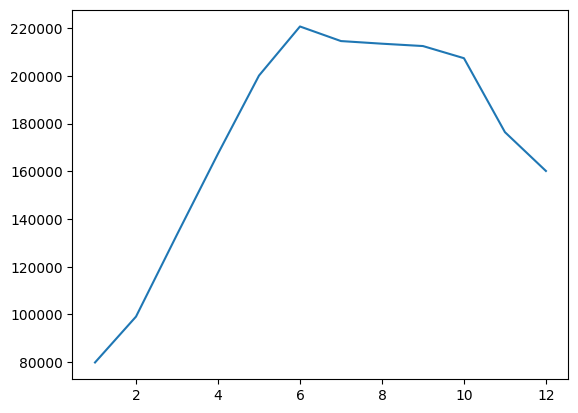

In [89]:
plt.plot(df_bike_month);

In [ ]:
df_bike_month_trend.plot()

# 4) 텍스트 데이터 처리

In [35]:
df_krx.지수명.unique()

array(['KRX 300', 'KTOP 30', 'KRX 100', 'KRX Mid 200', 'KRX 자동차',
       'KRX 반도체', 'KRX 헬스케어', 'KRX 은행', 'KRX 에너지화학', 'KRX 철강', 'KRX 방송통신',
       'KRX 건설', 'KRX 증권', 'KRX 기계장비', 'KRX 보험', 'KRX 운송', 'KRX 경기소비재',
       'KRX 필수소비재', 'KRX 미디어&엔터테인먼트', 'KRX 정보기술', 'KRX 유틸리티',
       'KRX 300 정보기술', 'KRX 300 금융', 'KRX 300 자유소비재', 'KRX 300 산업재',
       'KRX 300 헬스케어', 'KRX 300 커뮤니케이션서비스', 'KRX 300 소재', 'KRX 300 필수소비재'],
      dtype=object)

Q. 지수명이 `KRX 300` 을 포함하는 데이터만 가져오라

In [52]:
df_krx.loc[df_krx.지수명.str.contains('KRX 300'),'지수명'].unique()

array(['KRX 300', 'KRX 300 정보기술', 'KRX 300 금융', 'KRX 300 자유소비재',
       'KRX 300 산업재', 'KRX 300 헬스케어', 'KRX 300 커뮤니케이션서비스', 'KRX 300 소재',
       'KRX 300 필수소비재'], dtype=object)

Q. 지수명이 `KRX 300`, `KRX 자동차` 을 포함하는 데이터만 가져오라

In [53]:
df_krx[df_krx.지수명.str.contains('KRX 300|KRX 자동차')]['지수명'].unique()

array(['KRX 300', 'KRX 자동차', 'KRX 300 정보기술', 'KRX 300 금융',
       'KRX 300 자유소비재', 'KRX 300 산업재', 'KRX 300 헬스케어',
       'KRX 300 커뮤니케이션서비스', 'KRX 300 소재', 'KRX 300 필수소비재'], dtype=object)

In [54]:
df_krx[df_krx.지수명.str.contains('KRX 300| KRX 자동차')]['지수명'].unique()

array(['KRX 300', 'KRX 300 정보기술', 'KRX 300 금융', 'KRX 300 자유소비재',
       'KRX 300 산업재', 'KRX 300 헬스케어', 'KRX 300 커뮤니케이션서비스', 'KRX 300 소재',
       'KRX 300 필수소비재'], dtype=object)

> 'KRX 자동차' 가 없어지죠?ㅡ

In [55]:
df_krx[df_krx.지수명.str.contains('KRX 300|KRX 자동차')]['지수명'].nunique()

10

In [56]:
df_krx[df_krx.지수명.str.contains('KRX 300| KRX 자동차')]['지수명'].nunique()

9

> 주의! `|` 다음에 띄어쓰기 하면 안됨. 

Q. diamond데이터에서 cut이 `Good` 을 포함하는 행만 가져오라

In [234]:
df_diamond['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [17]:
df_diamond.loc[df_diamond['cut'].str.contains('Good'), 'cut'].unique()

array(['Good', 'Very Good'], dtype=object)

In [19]:
df_diamond.loc[df_diamond['cut'].isin(['Good']), 'cut'].unique()

array(['Good'], dtype=object)

> isin는 동등비교를 합니다. 
'Good' == 'Good', 'Good' != 'very Good',   

> contains는 내부글자들의 비교를 합니다.
'Good'이란 글자가 있는지 없는지
그래서 Good이란 very Good이 출력이 됩니다. 

# 6) Pivoting

- melt  
file: `weather.csv`
> 컬럼을 녹여서 행으로 보낸다

In [6]:
df_weather = pd.read_csv('../Datasets/weather.csv')
df_weather.head()

,day,chicago,chennai,berlin
0,Monday,32,75,41
1,Tuesday,30,77,43
2,Wednesday,28,75,45
3,Thursday,22,82,38
4,Friday,30,83,30


Q. berlin, chicago 의 일별 날씨 흐름을 차트로 표현하고 싶다. (melt 이용)

In [345]:
df_weather_melt_day=df_weather.melt(id_vars='day', value_name='temp')
df_weather_melt_day

,day,variable,temp
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


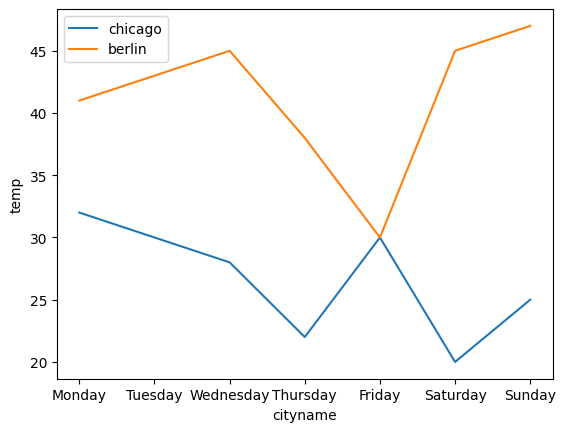

In [342]:
#시험에 그래프 그려라는 없어서 추이 확인할 땐 아래 쉬운 코드를 사용하세요.
import matplotlib.pyplot as plt
figure,axes = plt.subplots()

for cityname in ['chicago','berlin']:
    axes.plot(df_weather_melt_day.loc[df_weather_melt_day['variable']==cityname,'day'], \
            df_weather_melt_day.loc[df_weather_melt_day['variable']==cityname,'temp']  ,label=cityname)

axes.set_xlabel("cityname")
axes.set_ylabel("temp")
axes.legend(loc='best');

In [341]:
df_weather

,day,chicago,chennai,berlin
0,Monday,32,75,41
1,Tuesday,30,77,43
2,Wednesday,28,75,45
3,Thursday,22,82,38
4,Friday,30,83,30
5,Saturday,20,81,45
6,Sunday,25,77,47


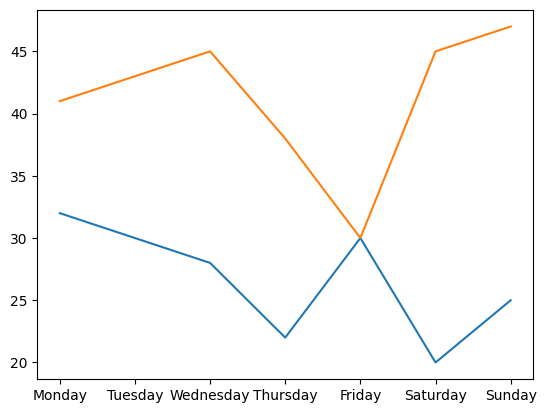

In [340]:
plt.plot(df_weather['day'], df_weather['chicago'])
plt.plot(df_weather['day'], df_weather['berlin']);

> 더 간단히도 할 수 있다.

# 7) 데이터 병합

- concat

In [353]:
train, test=df_weather[:3], df_weather[3:]

In [357]:
dataset = pd.concat([test, test])
dataset

,day,chicago,chennai,berlin
3,Thursday,22,82,38
4,Friday,30,83,30
5,Saturday,20,81,45
6,Sunday,25,77,47
3,Thursday,22,82,38
4,Friday,30,83,30
5,Saturday,20,81,45
6,Sunday,25,77,47


- merge
`vlookup`
- 테이블이 분리되어 있는 경우
    - ex) 보안수준

In [3]:
d1 = {'Name': ['장준규', '홍길동', '운영자'], 'ID': [1, 2, 3], 'Country': ['India', 'India', 'USA'],
      'Role': ['CEO', 'CTO', 'CTO']}
df1 = pd.DataFrame(d1)
df1

,Name,ID,Country,Role
0,장준규,1,India,CEO
1,홍길동,2,India,CTO
2,운영자,3,USA,CTO


In [4]:
df2 = pd.DataFrame({'ID': [1, 2, 3, 4], 'Security_Level': ['VIP1', 'VIP2', 'VIP2','VIP3']})
df2 

,ID,Security_Level
0,1,VIP1
1,2,VIP2
2,3,VIP2
3,4,VIP3


In [8]:
df_merge=pd.merge(left=df1, right=df2, how='left', on='ID')
df_merge

,Name,ID,Country,Role,Security_Level
0,장준규,1,India,CEO,VIP1
1,홍길동,2,India,CTO,VIP2
2,운영자,3,USA,CTO,VIP2


# 8) 기타

- lambda

Q. df_merge 에서 'CTO' 이면 1 아니면 0 인 'is_CTO' 컬럼을 사용자 정의 함수를 이용하여 작성하시오

In [376]:
def is_CTO(x):
    if x=='CTO':
        return 1
    else:
        return 0

In [378]:
df_merge['is_CTO']=df_merge['Role'].map(is_CTO)
df_merge

,Name,ID,Country,Role,Security_Level,is_CTO
0,Pankaj,1,India,CEO,VIP1,0
1,Meghna,2,India,CTO,VIP2,1
2,Lisa,3,USA,CTO,VIP2,1


Q. 위 문제를 lambda를 사용해서 작성하시오

In [ ]:
df_merge['Role'].map(lambda x: 1 if x=='CTO' else 0)

- 정규표현식 regular expression

In [61]:
import re

pattern = re.compile("01[0-9]{1}-[0-9]{4}-[0-9]{4}")

text = '마동석씨의 핸드폰 번호는 010-1234-5678 입니다 홍길동씨의 핸드폰 번호는 010-4567-5678 입니다 마동석씨의 핸드폰 번호는 010-1234-5678 입니다'

pattern.findall(text)

['010-1234-5678', '010-1234-5678', '010-1234-5678']